In [1]:
import numpy as np

# Khởi tạo các vector x, y ngẫu nhiên có độ dài 100
x = np.random.randn(100)
y = np.random.randn(100)

# Ma trận hiệp phương sai
np.cov(x, y)

array([[1.16035473, 0.13280769],
       [0.13280769, 1.06433064]])

In [2]:
# Phương sai của x
np.var(x, ddof=1)

# Hoặc 
x.var(ddof=1)

1.1603547288598703

In [3]:
# Phương sai của x
np.std(x, ddof=1)

# Hoặc
x.std(ddof=1)

1.0771976275780923

In [4]:
# Hệ số tương quan giữa x và y
np.corrcoef(x, y)

array([[1.        , 0.11950595],
       [0.11950595, 1.        ]])

In [5]:
import numpy as np
from scipy.stats import norm

x = np.array([1, 2, 3, 4, 5])
# Tính pdf cho véc tơ x theo phân phối chuẩn hoá
norm.pdf(x)

array([2.41970725e-01, 5.39909665e-02, 4.43184841e-03, 1.33830226e-04,
       1.48671951e-06])

In [6]:
import numpy as np
from scipy.stats import norm

# Tính cdf(x)= p(X<=x)
x = 2.1
p = norm.cdf(x)
p

0.9821355794371834

In [7]:
# Tính giá trị x dựa vào xác suất p=cdf(x)
norm.ppf(p)

2.0999999999999996

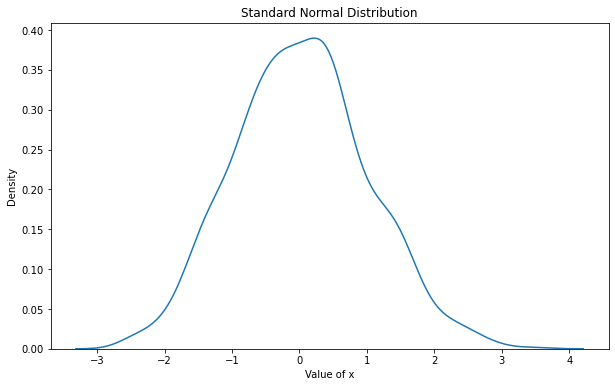

In [8]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

def _plot(x, title, figsize=(10, 6)):
  plt.figure(figsize=figsize)
  sns.kdeplot(x)
  plt.xlabel("Value of x")
  plt.title(title)

x = torch.randn(1000)
_plot(x, "Standard Normal Distribution")

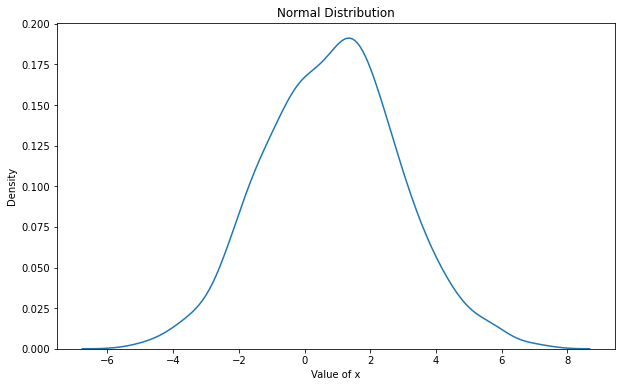

In [9]:
x = torch.normal(mean=1, std=2, size=(1000,))
_plot(x, "Normal Distribution")

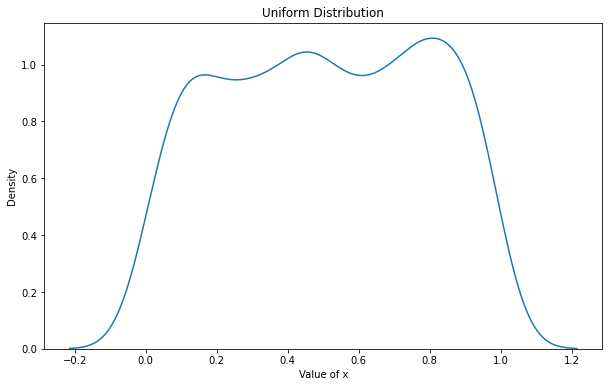

In [10]:
x = torch.rand(1000)
_plot(x, "Uniform Distribution")

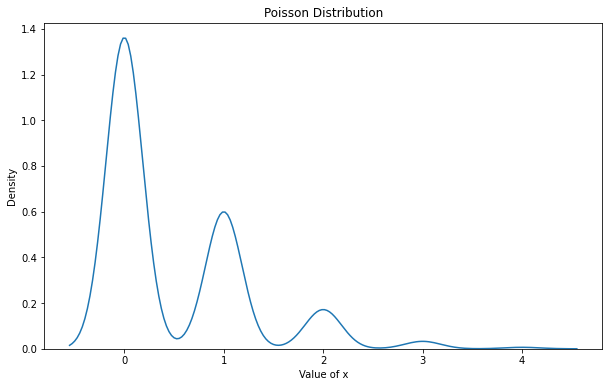

In [11]:
rates = torch.rand(1000)
x = torch.poisson(rates)
_plot(x, "Poisson Distribution")

In [12]:
import numpy as np

def _Poisson(k , lab):
  arr = torch.arange(1, k+1)
  prod = 1
  for i in arr:
    prod*=i
  poss = lab**k*np.e**(-lab)/prod
  return poss

# Lập phân phối Poisson với lambda = 6.5 và độ dài hàng chờ từ 1 tới 20.
lab=6.5
poss = []
for k in torch.arange(1, 21):
  poss_i = _Poisson(k, lab)
  poss.append(poss_i)

for k, p in enumerate(poss):
    print("Probability of the waiting length equal {}: {}%".format(k+1, round(p.numpy()*100, 2)))

print("Sum of probabilities: {}".format(sum(poss).numpy()))

Probability of the waiting length equal 1: 0.98%
Probability of the waiting length equal 2: 3.18%
Probability of the waiting length equal 3: 6.88%
Probability of the waiting length equal 4: 11.18%
Probability of the waiting length equal 5: 14.54%
Probability of the waiting length equal 6: 15.75%
Probability of the waiting length equal 7: 14.62%
Probability of the waiting length equal 8: 11.88%
Probability of the waiting length equal 9: 8.58%
Probability of the waiting length equal 10: 5.58%
Probability of the waiting length equal 11: 3.3%
Probability of the waiting length equal 12: 1.79%
Probability of the waiting length equal 13: 0.89%
Probability of the waiting length equal 14: 0.41%
Probability of the waiting length equal 15: 0.18%
Probability of the waiting length equal 16: 0.07%
Probability of the waiting length equal 17: 0.03%
Probability of the waiting length equal 18: 0.01%
Probability of the waiting length equal 19: 0.0%
Probability of the waiting length equal 20: 0.0%
Sum of 

In [13]:
import numpy as np

# Công thức tính luỹ thừa
def _mul_accum(k):
  assert k>=0
  prod = 1
  for i in np.arange(1, k+1):
    prod*=i
  return prod

# Công thức tính tổ hợp
def _combine(k, n):
  assert (k>=0) & (n>=k)
  acc_k = _mul_accum(k)
  acc_n = _mul_accum(n)
  acc_nk = _mul_accum(n-k)
  c_k_n = acc_n/(acc_k*acc_nk)
  return c_k_n

# Tính phân phối nhị thức
def _binary_dist(n, k, p):
  assert (k>=0) & (n>=k)
  c_k_n = _combine(k, n)
  prob = c_k_n*p**k*(1-p)**(n-k)
  return prob

# k = 2, n = 10, p = 0.5
k = 2
n = 10
p = 0.5
print("Probability of binary distribution with k = 2, n = 10, p = 0.5:")
_binary_dist(n, k, p)

Probability of binary distribution with k = 2, n = 10, p = 0.5:


0.0439453125

In [14]:
import torch
A = torch.tensor([[1, 2, 3, 4],
                  [3, 4, 5, 6],
                  [2, 3, 5, 6],
                  [1, 3, 5, 7]])